![Alt text](Introduction.png)

<a id="cont"></a>

## Table of Contents
<a href=#zero>1.1. Introduction</a>
<a href=#one>1.2. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

## 1.1. Introduction

<a class='anchor' id="one">
<a href="#cont">Back to Table of Contents</a>



## Problem Statement:

Predicting the price of a car is a multifaceted task influenced by numerous factors, including brand reputation, car features, fuel type, and mileage. Developing an accurate car price prediction model presents a significant challenge due to the complexity and variability of these factors. This project aims to address this challenge by leveraging machine learning techniques to build a robust predictive model. The objective is to explore various features such as brand goodwill, technical specifications, and market trends to train a model capable of accurately estimating the price of a car. The project will involve data collection, preprocessing, feature engineering, model selection, and evaluation to create a reliable predictive tool for car buyers and sellers. By successfully completing this project, participants will gain valuable insights into the intricacies of car pricing and develop skills in machine learning model development applicable to real-world scenarios.

 <a id="one"></a>
## 1.2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

![Alt text](import.png)

In [1]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.colors as mcolors

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

![Alt text](info.png)

In [4]:
car_data = pd.read_csv('car data.csv')

In [5]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [73]:
car_data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [74]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

There are no missing values in the DataFrame

In [75]:
car_data.duplicated().sum()

2

The DataFrame consists of two (2) duplicants present

In [76]:
car_data.shape

(301, 9)

There are 301 rows and 9 columns in the DataFrame

In [77]:
duplicate_rows = car_data[car_data.duplicated()]
duplicate_rows


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


![Alt text](Explore.png)

In [79]:
# Display all occurrences of duplicates
all_duplicate_rows = car_data[car_data.duplicated(keep=False)]
print("Duplicate Rows (All occurrences):")
all_duplicate_rows

Duplicate Rows (All occurrences):


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


Its important that we view the duplicants and since our data as not massive, we can print out and have a clear view of how the duplicants look like. Therefore, to view the duplicates in a DataFrame, we used pandas in Python. One can use the duplicated() function. This function returns a boolean Series indicating whether each row is a duplicate of a previous row.





In [80]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Text(0.5, 1.0, 'Driven Kilometers Distribution')

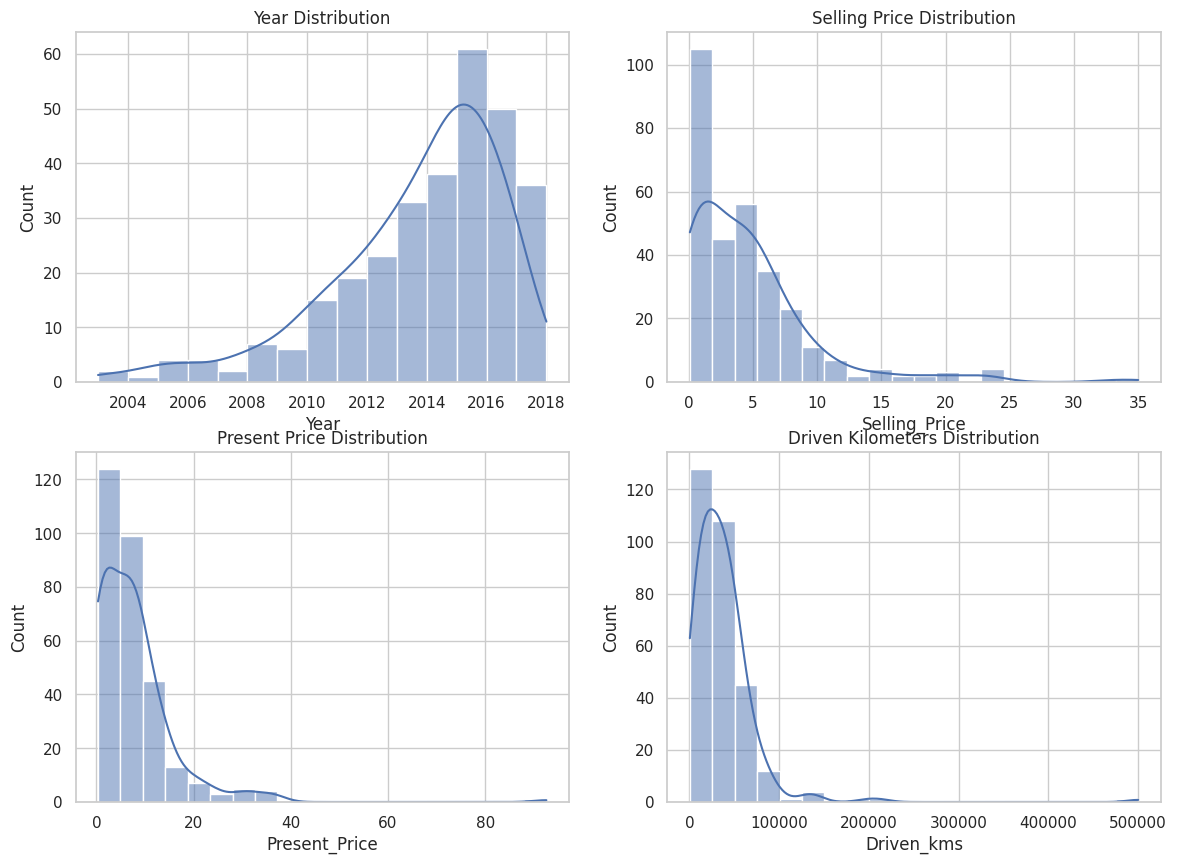

In [82]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Year Distribution
sns.histplot(ax=axes[0, 0], data=car_data, x='Year', bins=15, kde=True)
axes[0, 0].set_title('Year Distribution')

# Selling_Price Distribution
sns.histplot(ax=axes[0, 1], data=car_data, x='Selling_Price', bins=20, kde=True)
axes[0, 1].set_title('Selling Price Distribution')

# Present_Price Distribution
sns.histplot(ax=axes[1, 0], data=car_data, x='Present_Price', bins=20, kde=True)
axes[1, 0].set_title('Present Price Distribution')

# Driven_kms Distribution
sns.histplot(ax=axes[1, 1], data=car_data, x='Driven_kms', bins=20, kde=True)
axes[1, 1].set_title('Driven Kilometers Distribution')

# Insight
**Year distribution**:

*   The dataset contains information for 299 cars.
*   The cars in the dataset range from the year 2003 to 2018.

*   The standard deviation of the years is approximately 2.9, indicating moderate variability in the years of the cars


**Selling_Price**

*   The mean selling price is approximately 4.59 units, with a standard deviation of around 4.98.
*   The minimum selling price 0.1 units, indicating that there are some very cheap cars in the dataset.
*   The maximum selling price is 35 units, indicating the presence of some expensive cars in the dataset.
*   The mean is slightly greater than the median, suggesting a slight right skew or positive skewness in their distributions


**Present_Price**

*   The mean present price is approximately 7.54 units, with a standard deviation of around 8.57.
*   Present price are  0.32 units, indicating that there are some very cheap cars in the dataset.
*   The maximum present price is 92.6 units, indicating the presence of some expensive cars in the dataset.
*   The mean is slightly greater than the median, suggesting a slight right skew or positive skewness in their distributions.


**Driven_kms**

*   The mean driven kilometers is approximately 36,917, and the median driven kilometers is 32,000.
*   For driven kilometers, the mean is slightly greater than the median, indicating a slight right skew or positive skewness in its distribution as well.


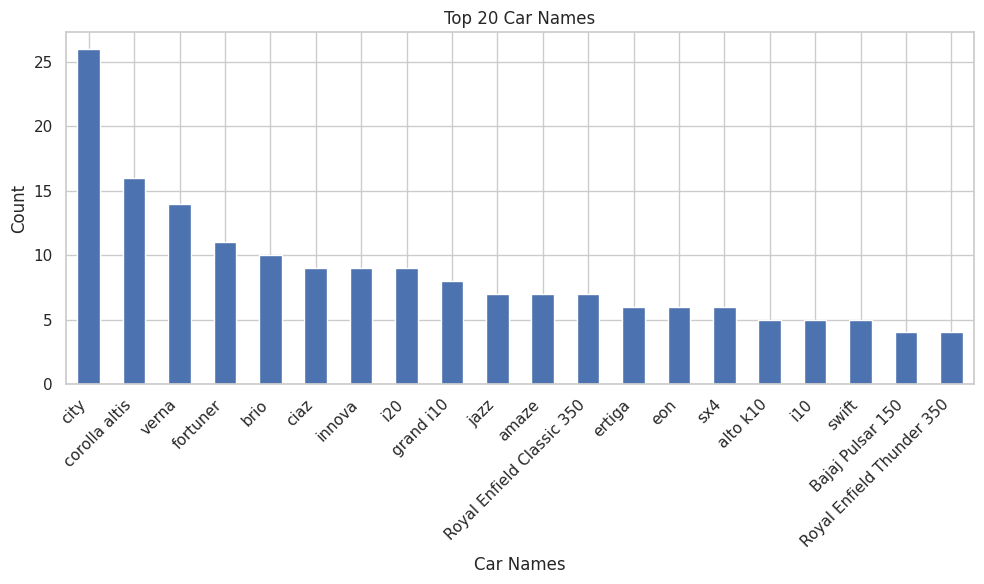

In [83]:
# Count occurrences of each car name
car_counts = car_data['Car_Name'].value_counts()

# Get top 20 car names
top_20_cars = car_counts.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_20_cars.plot(kind='bar')
plt.title('Top 20 Car Names')
plt.xlabel('Car Names')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

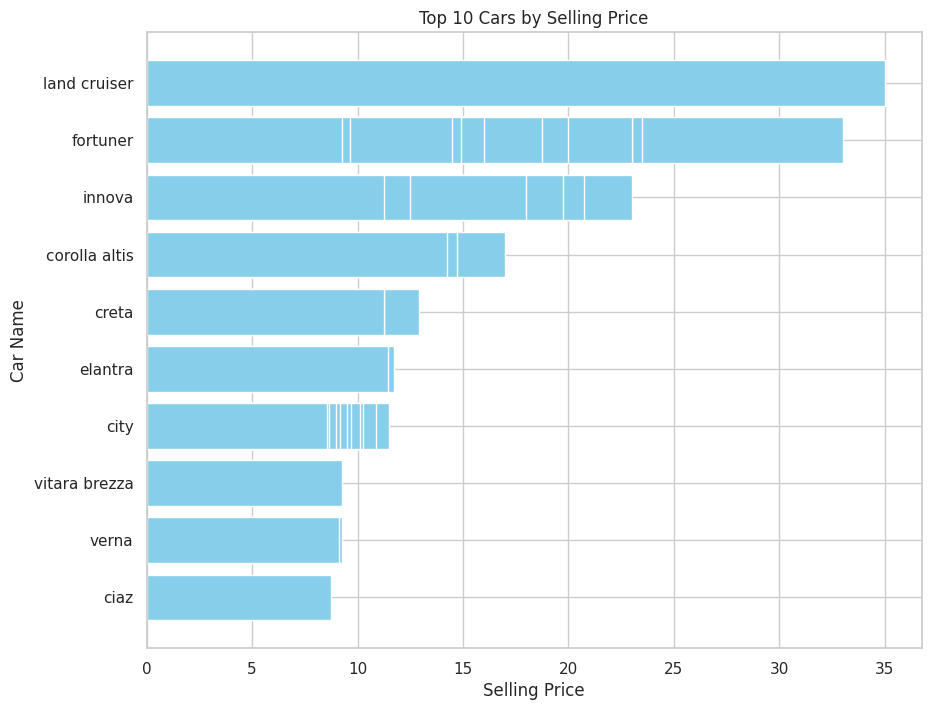

In [84]:
# Sort the DataFrame by Selling_Price in descending order
df_sorted = car_data.sort_values(by='Selling_Price', ascending=False)

# Take the top entries
top_cars = df_sorted.head(40)[['Car_Name', 'Selling_Price']]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_cars['Car_Name'], top_cars['Selling_Price'], color='skyblue')
plt.xlabel('Selling Price')
plt.ylabel('Car Name')
plt.title('Top 10 Cars by Selling Price')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest price at the top
plt.show()


This is top 10 car names and their selling prices, we typically sorted the data in descending order by the selling price and then display the top 20 entries. This is a reflection of which cars are the most expensive.

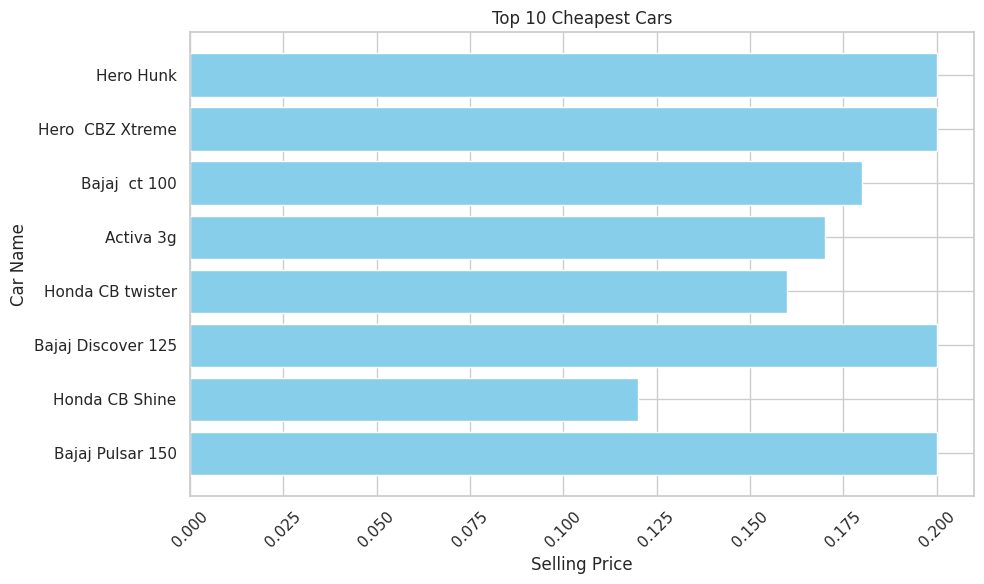

In [85]:
# Sort the DataFrame by 'Selling_Price' in ascending order and select top 10 cheapest cars
top_10_cheapest = car_data.sort_values(by='Selling_Price').head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_cheapest['Car_Name'], top_10_cheapest['Selling_Price'], color='skyblue')
plt.title('Top 10 Cheapest Cars')
plt.xlabel('Selling Price')
plt.ylabel('Car Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is the representive of the top 10 cheapest cars based on selling price, the DataFrame is sorted by the 'Selling_Price' column in ascending order and then plot the top 10 entries

<ipython-input-86-717bfac1ae6d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=car_data, x='Fuel_Type', y='Selling_Price', ci=None)


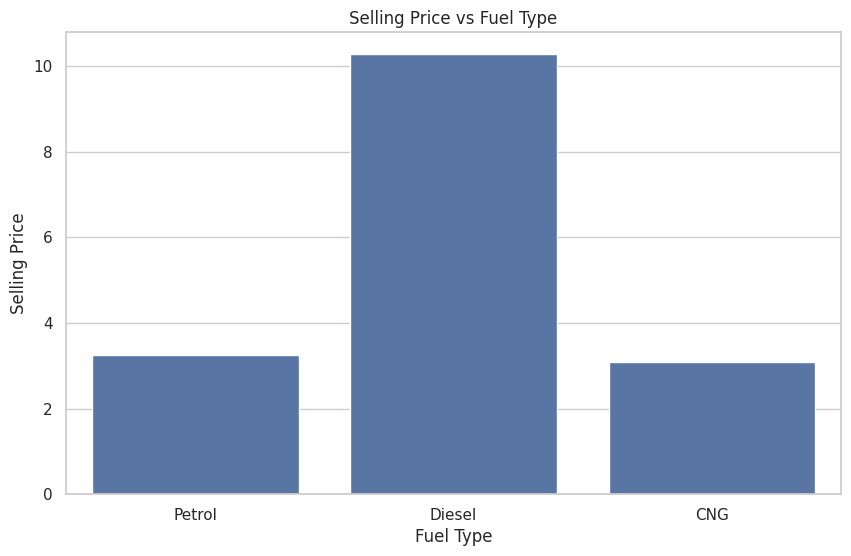

In [86]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=car_data, x='Fuel_Type', y='Selling_Price', ci=None)
plt.title('Selling Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


 The Diesel fuel type has the highest average selling price. This indicates that custmers prefer the Diesel and it is mostly purchased at higher prices

<ipython-input-87-ec7071b5aa3d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=car_data, x='Fuel_Type', y='Present_Price', ci=None)


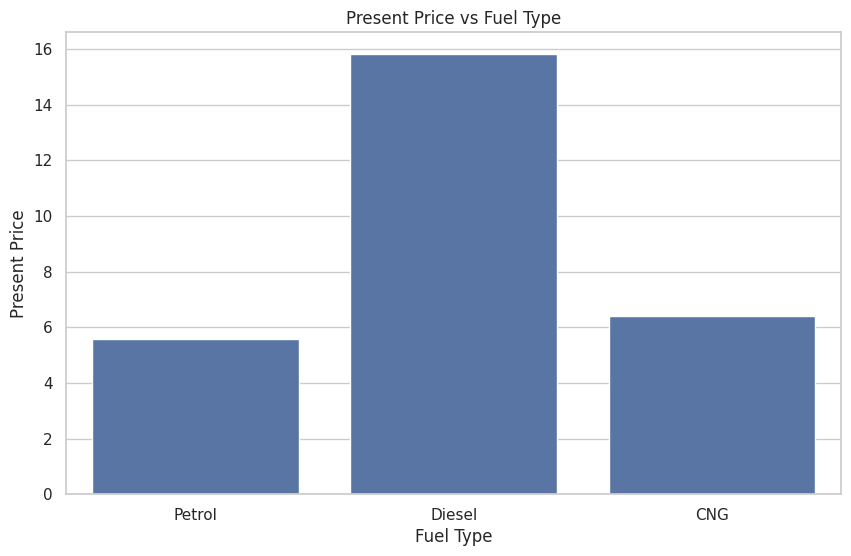

In [87]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=car_data, x='Fuel_Type', y='Present_Price', ci=None)
plt.title('Present Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Present Price')
plt.show()

 The Diesel fuel type has the highest average present price. This indicates that custmers prefer the Diesel and it is mostly purchased at higher prices. The CNG fuel type has overtaken the Petrol in the present price

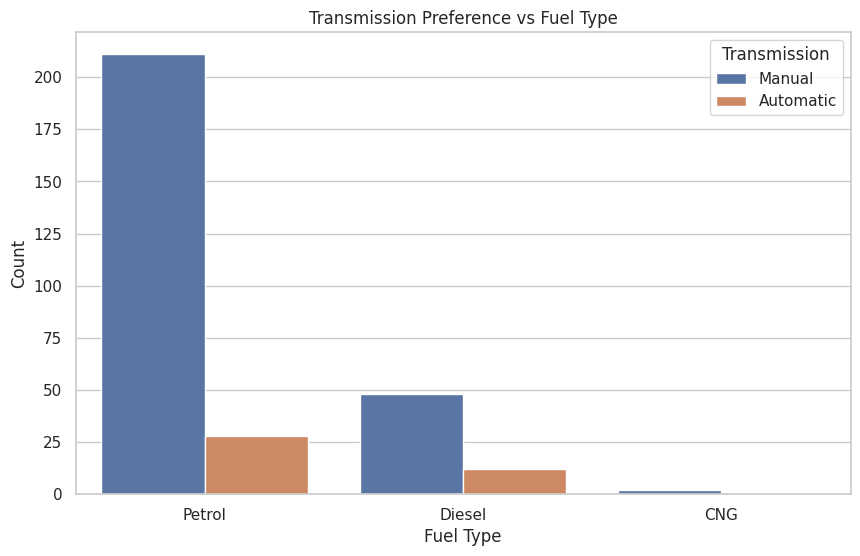

In [88]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=car_data, x='Fuel_Type', hue='Transmission')

plt.title('Transmission Preference vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.legend(title='Transmission')
plt.show()


The graphs shows that there are more Manual transmission type in all the fuel type.

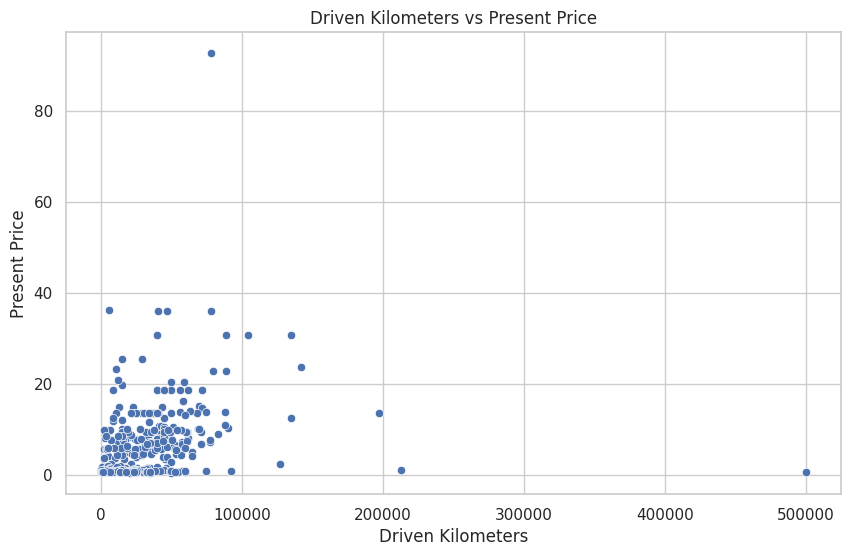

In [89]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_data, x='Driven_kms', y='Present_Price')
plt.title('Driven Kilometers vs Present Price')
plt.xlabel('Driven Kilometers')
plt.ylabel('Present Price')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


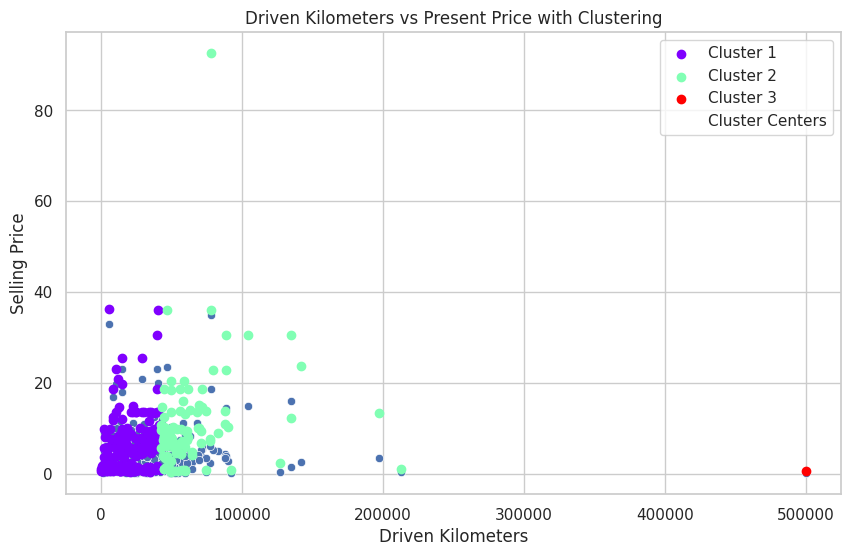

In [124]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_data, x='Driven_kms', y='Selling_Price')

# Perform K-means clustering
X = car_data[['Driven_kms', 'Present_Price']]
kmeans = KMeans(n_clusters=3, random_state=42)  # In this case we going to focus only on 3 clusters
kmeans.fit(X)
centers = kmeans.cluster_centers_

# Assign colors to each cluster using a rainbow colormap
num_clusters = len(centers)
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))

# Plot cluster points with rainbow colors
for i in range(num_clusters):
    cluster_points = X[kmeans.labels_ == i]
    plt.scatter(cluster_points['Driven_kms'], cluster_points['Present_Price'], color=colors[i], label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker=' ', s=300, label='Cluster Centers')

plt.title('Driven Kilometers vs Present Price with Clustering')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.legend()
plt.show()


* Cluster 1: They are custmers that want cars with less than 50000 driven kms
* Cluster 2: They are custmers that prefer cars with greater than 50000 driven kms but also less than 100000 driven kms
* Cluster 3: They prefer cars with greater than 400000 driven kms

This is clusters are influenced by the pricing and kms driven

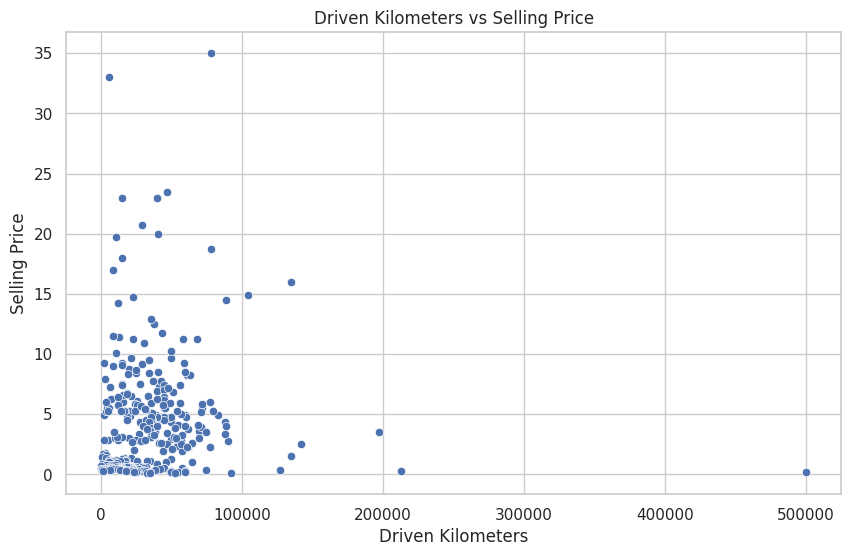

In [91]:
#Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_data, x='Driven_kms', y='Selling_Price')
plt.title('Driven Kilometers vs Selling Price')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


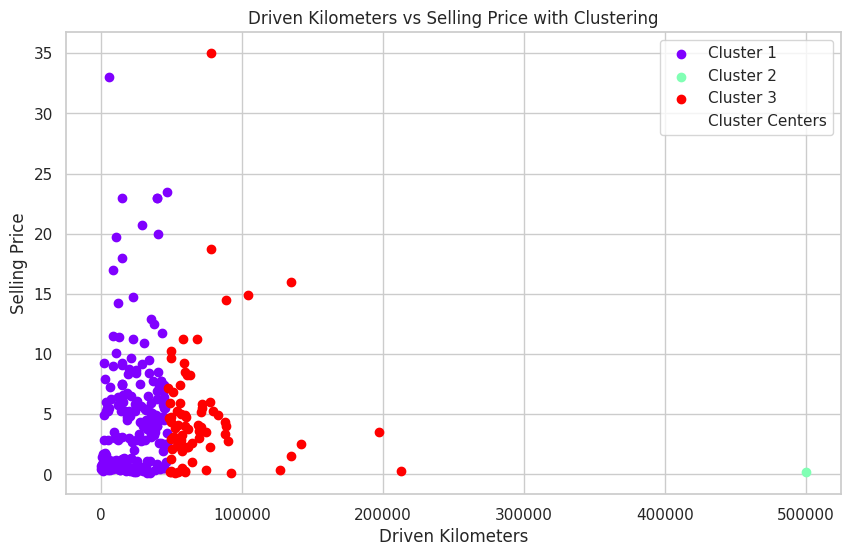

In [92]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_data, x='Driven_kms', y='Selling_Price')

# Perform K-means clustering
X = car_data[['Driven_kms', 'Selling_Price']]
kmeans = KMeans(n_clusters=3, random_state=42)  # In this case we going to focus only on 3 clusters
kmeans.fit(X)
centers = kmeans.cluster_centers_

# Assign colors to each cluster using a rainbow colormap
num_clusters = len(centers)
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))

# Plot cluster points with rainbow colors
for i in range(num_clusters):
    cluster_points = X[kmeans.labels_ == i]
    plt.scatter(cluster_points['Driven_kms'], cluster_points['Selling_Price'], color=colors[i], label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker=' ', s=300, label='Cluster Centers')

plt.title('Driven Kilometers vs Selling Price with Clustering')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.legend()
plt.show()


* Cluster 1: They are custmers that want cars with less than 50000 driven kms
* Cluster 2: They are custmers that prefer cars with greater than 50000 driven kms but also less than 100000 driven kms
* Cluster 3: They prefer cars with greater than 400000 driven kms

This is clusters are influenced by the pricing and kms driven

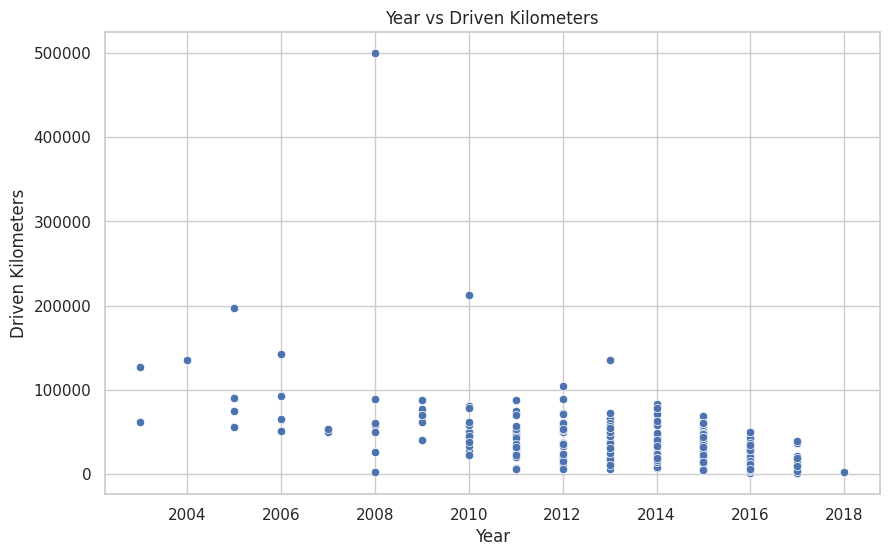

In [93]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_data, x='Year', y='Driven_kms')

plt.title('Year vs Driven Kilometers')
plt.xlabel('Year')
plt.ylabel('Driven Kilometers')
plt.show()


From the "Year Vs Driven Kilometers" graph shows that cars released in the year 2009, there was slight increase in car sells that were driven less than 100000kms  and this can be influenced by the global vehicle manufacture, as it saw an increase in vehicle manufacturing. The more vehicles that released isthe more people tend to trade in their cars in pursue to purchase the latest car model.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

![Alt text](Cleaning.png)

In [95]:
car_data.drop_duplicates(inplace=True)

Handling duplicated data depends on the context of our analysis and the nature of the duplicates, in this case we took the approach of Identifing and Removing Duplicates: we used pandas in Python to identify and remove duplicate rows from our dataset. This was achieved by using the drop_duplicates() function in pandas

In [96]:
car_data.shape

(299, 9)

After handling our duplicates from the DataFrame, we have 299 rows and 9 columns.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we are required to create one or more regression models that are able to accurately predict the selling price of the car. |

---


![Alt text](modeling.jpg)

In [98]:
label_encoder = LabelEncoder()
car_data['Transmission_LabelEncoded'] = label_encoder.fit_transform(car_data['Transmission'])

In [99]:
car_data['Fuel_type_LabelEncoded'] = label_encoder.fit_transform(car_data['Fuel_Type'])

In [100]:
car_data['Selling_LabelEncoded'] = label_encoder.fit_transform(car_data['Selling_type'])

In [101]:
# Dropping the original columns
car_data.drop(['Transmission', 'Fuel_Type', 'Selling_type'], axis=1, inplace=True)

## Hyperparameter tuning

In [103]:
# Function to identify outliers using z-score
def identify_outliers_z_score(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return np.where(z_scores > threshold)

# Function to identify outliers using IQR
def identify_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))

# Example usage:
# 'car_data' is a pandas DataFrame or numpy array containing our numerical features
# For z-score method
outliers_z_score = identify_outliers_z_score(car_data['Selling_Price'])

# For IQR method
outliers_iqr = identify_outliers_iqr(car_data['Selling_Price'])


In [104]:
outliers_z_score

(array([50, 58, 62, 63, 65, 81, 85, 94]),)

In [105]:
outliers_iqr

(array([49, 50, 51, 52, 58, 61, 62, 63, 65, 68, 78, 79, 81, 85, 94, 95]),)

In [106]:
# Remove outliers based on z-score method
data_without_outliers_z_score = car_data.drop(outliers_z_score[0])

# Remove outliers based on IQR method
data_without_outliers_iqr = car_data.drop(outliers_iqr[0])


In [107]:
# Function to identify outliers using z-score
def identify_outliers_z_score(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return np.where(z_scores > threshold)

# Function to identify outliers using IQR
def identify_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))

# Example usage:
# 'car_data' is a pandas DataFrame or numpy array containing our numerical features
# For z-score method
outl_z_score = identify_outliers_z_score(car_data['Present_Price'])

# For IQR method
outl_iqr = identify_outliers_iqr(car_data['Present_Price'])


In [108]:
outl_z_score

(array([58, 61, 62, 63, 85]),)

In [109]:
outl_iqr

(array([49, 50, 52, 58, 61, 62, 63, 65, 77, 78, 81, 84, 85, 94]),)

In [110]:
# Remove outliers based on z-score method
data_without_outliers_z_score = car_data.drop(outl_z_score[0])

# Remove outliers based on IQR method
data_without_outliers_iqr = car_data.drop(outl_iqr[0])

In [111]:
# Select numerical features for scaling
numerical_features = ['Year',	'Selling_Price',	'Present_Price',	'Driven_kms',	'Owner',	'Transmission_LabelEncoded',	'Fuel_type_LabelEncoded',	'Selling_LabelEncoded']

# Instantiate StandardScaler
scaler = StandardScaler()

# Scale the selected numerical features
scaled_features = scaler.fit_transform(car_data[numerical_features])

# Replace the original numerical features with scaled ones in the DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features)

# Show the scaled DataFrame
print(df_scaled)


         Year  Selling_Price  Present_Price  Driven_kms     Owner  \
0    0.132992      -0.249127      -0.228138   -0.254603 -0.175101   
1   -0.212787       0.032229       0.233742    0.156181 -0.175101   
2    1.170329       0.534651       0.269991   -0.770651 -0.175101   
3   -0.904345      -0.349612      -0.396520   -0.814297 -0.175101   
4    0.132992       0.002084      -0.078466    0.142061 -0.175101   
..        ...            ...            ...         ...       ...   
294  0.824550       0.986831       0.474622   -0.075193 -0.175101   
295  0.478771      -0.118498      -0.191889    0.592640 -0.175101   
296 -1.595904      -0.249127       0.404463    1.309818 -0.175101   
297  1.170329       1.388768       0.579860   -0.716735 -0.175101   
298  0.824550       0.142762      -0.191889   -0.807519 -0.175101   

     Transmission_LabelEncoded  Fuel_type_LabelEncoded  Selling_LabelEncoded  
0                     0.387298                0.491847             -0.741096  
1            

# Model: Linear Regression

### Model Training

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# We features (X) and target variable (y)
X = df_scaled.drop([ 'Selling_Price'], axis=1)  # Features
y = df_scaled['Selling_Price']  # Target variable
# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [113]:
# Instantiate the model (e.g., Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we are required to compare the relative performance of the various trained models on a holdout dataset and comment on what model is the best and why. |

---

![Alt text](Performance.png)

# Model Evaluation: Train Data

In [114]:
# Prediction on Training data
y_pred = model.predict(X_train)

In [115]:
from sklearn.metrics import r2_score

error_score = r2_score(y_train, y_pred)
print(f"R-squared: {error_score}")

R-squared: 0.8768029664697253


# Model Evalution: Test Data

In [116]:
# Prediction on Test data
y_test_pred = model.predict(X_test)

In [117]:
from sklearn.metrics import r2_score

error_score = r2_score(y_test, y_test_pred)
print(f"R-squared: {error_score}")

R-squared: 0.8561865067078207


In [118]:
car_data.nunique()

Car_Name                      98
Year                          16
Selling_Price                156
Present_Price                148
Driven_kms                   206
Owner                          3
Transmission_LabelEncoded      2
Fuel_type_LabelEncoded         3
Selling_LabelEncoded           2
dtype: int64

We import StandardScaler from sklearn.preprocessing.
We instantiate StandardScaler.
We specify the numerical features (''Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Transmission_LabelEncoded', 'Fuel_Type_CNG',	'Fuel_Type_Diesel',	'Fuel_Type_Petrol') that we want to scale.
We apply fit_transform method of StandardScaler to scale the selected numerical features in the dataset.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

![Alt text](explain.webp)

In [56]:
# Ensure y_test and y_pred have the same length
min_length = min(len(y_test), len(y_pred))
y_test = y_test[:min_length]
y_pred = y_pred[:min_length]

# Create DataFrame
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': [a - p for a, p in zip(y_test, y_pred)]})

print(pred_df)

     Actual Value  Predicted Value  Difference
181          0.30         0.756435   -0.456435
223          8.25        10.058873   -1.808873
228          4.95         5.754178   -0.804178
7            6.50         2.781427    3.718573
175          0.38         7.651702   -7.271702
31           2.35         9.707629   -7.357629
185          0.25         3.234974   -2.984974
183          0.27         1.626994   -1.356994
273          2.25         1.825310    0.424690
143          0.60         6.776883   -6.176883
13           6.10         7.401116   -1.301116
274          5.30         4.358912    0.941088
36           4.65         1.360867    3.289133
272          7.50         1.793243    5.706757
78           5.25        -0.401890    5.651890
269          6.70         4.737698    1.962302
208          7.90        -1.842922    9.742922
96          20.75         5.582594   15.167406
92           3.51         7.604986   -4.094986
216          2.90         1.626974    1.273026
3            

A brief interpretation of the DataFrame:

*   'Actual Value': The actual values of the target variable.
*   'Predicted Value': The values predicted by the regression model.
*   'Difference': The absolute difference between the actual and predicted values. A positive difference indicates an overestimate by the model, while a negative difference indicates an underestimate.


Large differences between the actual and predicted values (both positive and negative) may indicate areas where the model is not performing well.
Consistently large differences across multiple samples may suggest systematic issues with the model.
Plotting the differences can provide a visual representation of the model's performance, As shown below



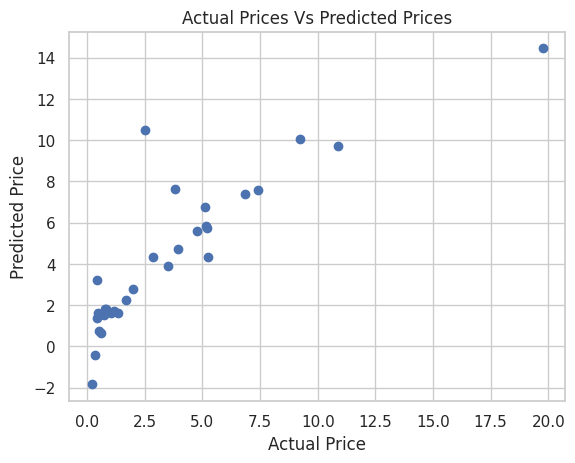

In [60]:
# Ensure y_test and y_pred have the same length
min_length = min(len(y_train), len(y_pred))
y_train = y_train[:min_length]
y_pred = y_pred[:min_length]

# Scatter plot
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

# Remarks

### 🏆 Model Ranking 😃

Linear Regression: with a solid 85.1% performance ✈



😃😃Thank for reading my analysis and my regression. 😃😃

🤝🤝If anyone has a model with a higher percentage, please tell me 🤝🤝